In [1]:

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:

# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [3]:
import splitfolders
splitfolders.ratio('dataset', output="SPLIT1", seed=42, ratio=(.8, 0.1,0.1))

Copying files: 3076 files [00:21, 142.63 files/s]


In [4]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'SPLIT1/train'
valid_path = 'SPLIT1/test'

In [5]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:

  # useful for getting number of output classes
folders = glob('SPLIT1/train/*')

In [8]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# our layers - you can add more if you want
x = Flatten()(inception.output)
x = Dense(512, activation='relu')(x)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 111, 111, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 111, 111, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 111, 111, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 109, 109, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 109, 109, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 109, 109, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 109, 109, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 109, 109, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 109, 109, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 54, 54, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 54, 54, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 54, 54, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 54, 54, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 52, 52, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 48,021,287 (183.19 MB)

 Trainable params: 26,218,503 (100.02 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [11]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import math

# Define a function to adjust the learning rate
def lr_schedule(epoch, lr):
    # Learning rate schedule can be adjusted based on the epoch
    if epoch < 10:
        return lr  # Keep the initial learning rate for the first 10 epochs
    else:
        return lr * math.exp(-0.1)  # Exponential decay schedule

# Define the initial learning rate
initial_lr = 0.0001  # Best performing learning rate

# Create an instance of the LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

In [12]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', 
              metrics=['accuracy'],
             )

In [13]:
for layer in inception.layers[:249]:
    layer.trainable = False
for layer in inception.layers[249:]:
    layer.trainable = True

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory('SPLIT1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2457 images belonging to 7 classes.


In [16]:
test_set = test_datagen.flow_from_directory('SPLIT1/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 315 images belonging to 7 classes.


In [17]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=40,
  callbacks=[lr_scheduler]  
)

Epoch 1/40


C:\Users\KIIT\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/77 ━━━━━━━━━━━━━━━━━━━━ 235s 3s/step - accuracy: 0.3509 - loss: 2.0654 - val_accuracy: 0.6063 - val_loss: 1.0633 - learning_rate: 1.0000e-04
Epoch 2/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.6749 - loss: 0.8932 - val_accuracy: 0.6476 - val_loss: 1.0166 - learning_rate: 1.0000e-04
Epoch 3/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.7849 - loss: 0.6070 - val_accuracy: 0.6825 - val_loss: 0.9220 - learning_rate: 1.0000e-04
Epoch 4/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.8427 - loss: 0.4368 - val_accuracy: 0.7079 - val_loss: 0.9149 - learning_rate: 1.0000e-04
Epoch 5/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.8843 - loss: 0.3369 - val_accuracy: 0.7206 - val_loss: 0.9979 - learning_rate: 1.0000e-04
Epoch 6/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.9131 - loss: 0.2562 - val_accuracy: 0.6825 - val_loss: 1.0982 - learning_rate: 1.0000e-04
Epoch 7/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.9231 - loss: 0.2

In [18]:
import matplotlib.pyplot as plt


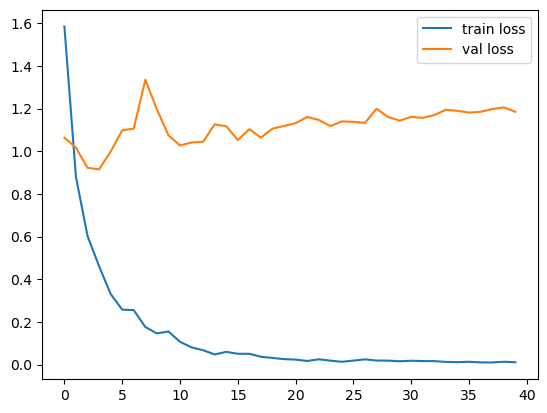

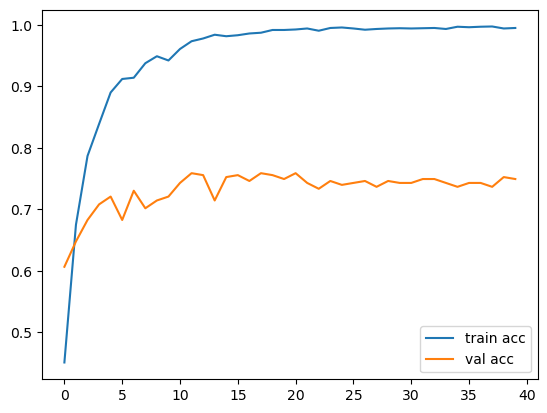

<Figure size 640x480 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
from tensorflow.keras.models import load_model

model.save('model_best(2).h5')

In [21]:
y_pred = model.predict(test_set)

10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step


In [22]:
y_pred

array([[2.0489004e-05, 9.9835098e-01, 9.9814197e-06, ..., 3.9377541e-04,
        6.1712024e-04, 5.4341211e-04],
       [5.5250595e-08, 3.2804428e-06, 3.0292995e-06, ..., 6.3951502e-06,
        9.9136752e-01, 8.6196316e-03],
       [1.7839811e-06, 2.8569474e-08, 3.6692873e-07, ..., 1.1390767e-06,
        1.0468199e-04, 9.9989200e-01],
       ...,
       [2.5803732e-02, 7.4278861e-03, 9.6311129e-04, ..., 2.3593899e-05,
        4.9807350e-03, 9.6058565e-01],
       [1.0000000e+00, 6.5764424e-14, 9.9725184e-19, ..., 1.4329745e-12,
        1.2461770e-13, 3.3124001e-09],
       [2.8714574e-05, 2.5556094e-04, 1.2357630e-07, ..., 9.9971133e-01,
        4.6326952e-07, 6.3967491e-07]], dtype=float32)

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([1, 5, 6, 0, 0, 6, 6, 2, 1, 4, 6, 2, 0, 1, 0, 4, 5, 5, 0, 6, 1, 6,
       4, 4, 1, 0, 1, 0, 4, 2, 6, 2, 1, 5, 1, 5, 1, 1, 1, 1, 4, 6, 0, 0,
       6, 5, 1, 0, 5, 0, 0, 4, 4, 0, 6, 6, 5, 1, 2, 2, 2, 0, 6, 6, 1, 0,
       1, 0, 0, 6, 6, 0, 1, 0, 0, 0, 5, 4, 5, 1, 6, 4, 1, 1, 5, 0, 4, 6,
       4, 0, 0, 0, 4, 2, 5, 1, 5, 6, 4, 6, 5, 2, 6, 4, 1, 0, 2, 1, 6, 1,
       1, 1, 5, 0, 6, 1, 1, 1, 1, 1, 4, 5, 0, 6, 6, 5, 2, 1, 6, 1, 1, 1,
       5, 5, 4, 1, 6, 5, 4, 5, 2, 2, 2, 4, 1, 5, 0, 1, 4, 5, 0, 6, 5, 2,
       0, 6, 1, 4, 1, 5, 4, 5, 1, 1, 6, 0, 6, 1, 6, 0, 4, 4, 0, 4, 1, 5,
       5, 5, 4, 4, 6, 2, 6, 1, 0, 6, 4, 5, 0, 2, 0, 1, 1, 5, 4, 1, 0, 3,
       6, 0, 4, 1, 2, 4, 4, 2, 1, 0, 1, 0, 5, 0, 6, 1, 6, 4, 2, 2, 6, 0,
       5, 6, 6, 1, 1, 6, 2, 2, 0, 6, 1, 1, 4, 0, 4, 0, 4, 4, 4, 4, 1, 0,
       0, 3, 1, 6, 0, 0, 5, 5, 4, 3, 1, 6, 0, 1, 6, 1, 4, 6, 0, 5, 0, 1,
       4, 1, 1, 4, 1, 5, 1, 0, 1, 4, 6, 6, 1, 0, 0, 6, 5, 4, 3, 6, 4, 1,
       4, 0, 4, 5, 6, 1, 1, 1, 0, 0, 1, 6, 1, 0, 6,